Ejr2: 

Hallar $\int\int_D xy \, dx\, dy$ siendo $D$ el conjunto de los puntos $(x,y) \in \mathbb{R^2}$ que satisfacen $0\le y\le x+2$ y $4x^2+9y^2\le 36$

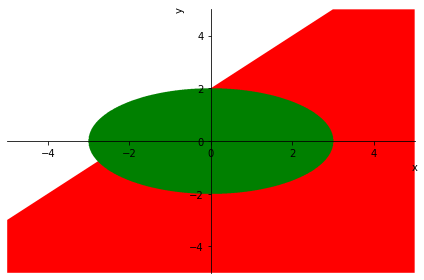

In [1]:
%matplotlib inline
import sympy as sp
from sympy import plot_implicit
x,y=sp.symbols('x,y')
fig1=plot_implicit(y<=x+2,line_color='red',show=False)
fig2=plot_implicit(4*x**2+9*y**2<=36,line_color='green',show=False,alpha=0.1)
fig1.extend(fig2)
fig1.show()
#from sympy.logic.boolalg import And
#fig3=plot_implicit(And(y<=x+2,4*x**2+9*y**2<=36),line_color='orange') #Me funciona en windows

In [2]:
f=x*y
#Modo 1:
I1=sp.integrate(f,(y,0,x+2),(x,-2,0)) #Ojo!! el orde de las variables es importante
I2=sp.integrate(f,(y,0,3*sp.sqrt(1-x**2/2**2)),(x,0,2))
I=I1+I2
print(I)

23/6


In [3]:
#Modo 2
I=sp.integrate(f, (x,y-2,3*sp.sqrt(1-y**2/2**2)),(y,0,2))
print(I)

23/6


Ejr 5: Calcular el área de la región $D$ del primer cuadrante comprendida entre las curvas $y^2=2x$, $2x+y=20$ e $y=0$

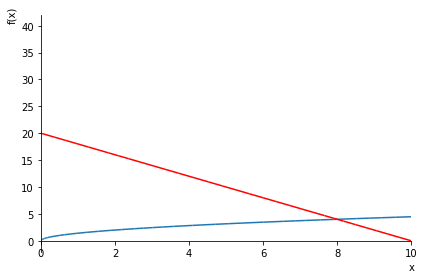

Area=  25.3333333333333


In [4]:
import sympy as sp
x,y=sp.symbols('x,y')
fig=sp.plot(sp.sqrt(2*x),20-2*x,xlim=(0,10),show=False)
fig[1].line_color='r'
fig.show()
f=1.
A=sp.integrate(f,(x,y**2/2,10-y/2),(y,0,4))
print("Area= ",A)

Ejr 7: Calcular el volumen de la región tridimensional limitada inferiormente por el grafo de la función $f(x,y)=(x^2+
y^2)^{1/4}$ y superiormente por el cilindro $x^2+y^2\le 5$ y $z=4$.

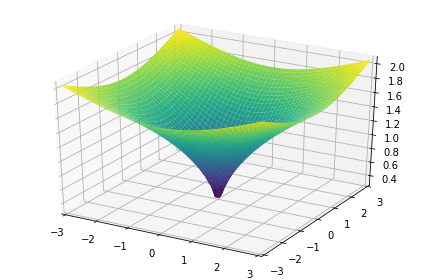

In [5]:
import sympy as sp
from sympy.plotting import plot3d
x,y=sp.symbols('x,y')
f=(x**2+y**2)**(1/4)
#g=x**2+y**2
fig=plot3d(f,(x,-3,3),(y,-3,3), cmap="Greens",show=False)
#fig2=plot3d(g,(x,-3,3),(y,-3,3),cmap="Reds",show=False)
#fig2.extend(fig)
fig.show()
#fig2.show()
#El cilindro no sé cómo es en Sympy

In [6]:
#Modo 1
f=4 - (x**2+y**2)**(1/4)
r,tetha=sp.symbols('r,tetha')
g=f.subs([(x,r*sp.cos(tetha)),(y,r*sp.sin(tetha))])
F = sp.Matrix([r*sp.cos(tetha),r*sp.sin(tetha)])
J=F.jacobian([r,tetha])
print(J)
detJ=sp.Abs(J.det())
detJ=sp.simplify(detJ)
print(detJ)
Vol=sp.integrate(g*detJ,(r,0,sp.sqrt(5)),(tetha,0,2*sp.pi))
print(Vol)

Matrix([[cos(tetha), -r*sin(tetha)], [sin(tetha), r*cos(tetha)]])
Abs(r)
14.0186048751151*pi


In [7]:
#Modo 2
r,tetha,z=sp.symbols('r,tetha,z')
F = sp.Matrix([r*sp.cos(tetha),r*sp.sin(tetha),z])
J=F.jacobian([r,tetha,z])
print(J)
detJ=sp.Abs(J.det())
detJ=sp.simplify(detJ)
detJ=J.det()
print(detJ)
h=1.
z0=sp.symbols('z0')
z0=sp.simplify((r*sp.cos(tetha)**2+r*sp.sin(tetha)**2)**(1/4))
print(z0)
Vol=sp.integrate(h,(z,z0,4),(r,0,sp.sqrt(5)),(tetha,0,2*sp.pi))
print(Vol.evalf())

Matrix([[cos(tetha), -r*sin(tetha), 0], [sin(tetha), r*cos(tetha), 0], [0, 0, 1]])
r*sin(tetha)**2 + r*cos(tetha)**2
r**0.25
42.4541076508128


Ejr 14: Calcular el volumen del sólido limitado superiormente por la esfera $x^2+y^2+z^2=5$ e inferiormente por el paraboloide $x^2+y^2=4z$. Aproximar la integral vía el punto medio y calcular el error cometido

In [10]:
import sympy as sp
#Modo 1 (integral doble)
x,y=sp.symbols('x,y')
f=sp.sqrt(5-x**2-y**2);g=1/4*(x**2+y**2)
#y0=sp.sqrt(2**2-x**2)
#V=sp.integrate(f-g,(y,-y0,y0),(x,-2,2), manual=True)#Muy larga.. Tarda en hacerla
#print("Vol= ",V)

r,theta=sp.symbols('r,theta')
x0=r*sp.cos(theta)
y0=r*sp.sin(theta)
f1=f.subs([(x,x0),(y,y0)]);g1=g.subs([(x,x0),(y,y0)])
h=f1-g1
V=sp.integrate(h*r,(r,0,2),(theta,0,2*sp.pi))
Ve=V.evalf()
print("Vol= ",Ve)

Vol=  15.0384686938963


In [16]:
n=2
m=4
h1=sp.lambdify([r,theta],h)
import numpy as np
dx=2/n; dy=2*np.e/m
#print(dx,dy)
p0=np.linspace(0,2,num=n+1)
#print(p0)
p1=np.linspace(0,1,num=m+1)
#print(p1)
p0m=p0+dx
p1m=p1+dy
#print("--", p0m,"   -- ", p1m)
Va=0
for x0 in p0m[0:n]:
    for y0 in p1m[0:m]:
        #print("(x0,y0)",(x0,y0))
        pto=np.array([x0,y0])
        #print((x0,y0),g(x0,y0),f.subs([(x,x0),(y,y0)]))
        Va+=h1(x0,y0)
Va=Va*dx*dy
print("Va=", Va)
print("error= ", np.abs(Va-Ve))

Va= 9.513986399606658
error=  5.52448229428965
